# Course Recommendation using Cosine Similarity
Cosine similarity is a commonly used similarity metric in machine learning and natural language processing. It measures the similarity between two vectors by computing the cosine of the angle between them. The two vectors are typically represented as lists of numerical values, and each element in the list corresponds to a different feature or dimension.
![Vector Similarity](https://www.machinelearningplus.com/wp-content/uploads/2018/10/soft-cosine.png)

The cosine similarity metric is particularly useful for comparing text documents or word embeddings in natural language processing. In this context, each document or word is represented as a vector of numerical values, where each value represents the importance or frequency of a particular word or feature. By computing the cosine similarity between two vectors, we can determine how similar the two documents or words are based on the words they share in common.

The cosine similarity metric ranges from -1 to 1, with -1 indicating completely opposite vectors, 0 indicating vectors that are orthogonal (perpendicular) to each other, and 1 indicating identical vectors.

To calculate the cosine similarity between two vectors, we use the following formula:
$$\text{cosine_similarity}(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\|\|\mathbf{y}\|}$$

Then, we calculate the cosine distance between two vectors using the formula:
$$\text{cosine_distance}(\mathbf{x}, \mathbf{y}) = 1 - \text{cosine_similarity}(\mathbf{x}, \mathbf{y})$$




In [123]:
# Load data analysis packages
import pandas as pd
import neattext.functions as nfx

In [141]:
# Load ML packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
from sklearn.decomposition import PCA

In [125]:
# Load the CSV data
df = pd.read_csv("data/coursera_data.csv")
df.head()


,course_name,university,difficulty_level,course_rating,course_url,course_description,course_skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


### Cleaning Data
As can be seen above, the `course_name` consists of many filler words like `and, or, the`. We don't want these filler words in our vectors. So, we use the `neattext` library to remove such words from our data.

In [127]:
# Remove stop words from data
df['clean_course_name'] = df['course_name'].apply(nfx.remove_stopwords)
# Remove special characters
df['clean_course_name'] = df['clean_course_name'].apply(nfx.remove_special_characters)
df[['course_name','clean_course_name']]


,course_name,clean_course_name
0,Write A Feature Length Screenplay For Film Or ...,Write Feature Length Screenplay Film Television
1,Business Strategy: Business Model Canvas Analy...,Business Strategy Business Model Canvas Analys...
2,Silicon Thin Film Solar Cells,Silicon Thin Film Solar Cells
3,Finance for Managers,Finance Managers
4,Retrieve Data using Single-Table SQL Queries,Retrieve Data SingleTable SQL Queries
...,...,...
3517,"Capstone: Retrieving, Processing, and Visualiz...",Capstone Retrieving Processing Visualizing Dat...
3518,Patrick Henry: Forgotten Founder,Patrick Henry Forgotten Founder
3519,Business intelligence and data analytics: Gene...,Business intelligence data analytics Generate ...
3520,Rigid Body Dynamics,Rigid Body Dynamics


In [128]:
# Vectorize our Text
count_vect = CountVectorizer()
cv_mat = count_vect.fit_transform(df['clean_course_name'])


In [134]:
# Dense Matrix
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [135]:
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=count_vect.get_feature_names_out())
df_cv_words.head()


,10,10000,101,102,1650,17002000,1760,1910,19621974,1e,...,young,your,yourself,youth,yuan,zap,zcurve,zero,zoning,zos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
# Cosine Similarity Matrix
cosine_sim_mat = cosine_similarity(cv_mat)

In [137]:
cosine_sim_mat

array([[1.        , 0.        , 0.18257419, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.27216553, 0.        ,
        0.        ],
       [0.18257419, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.27216553, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

<Axes: >

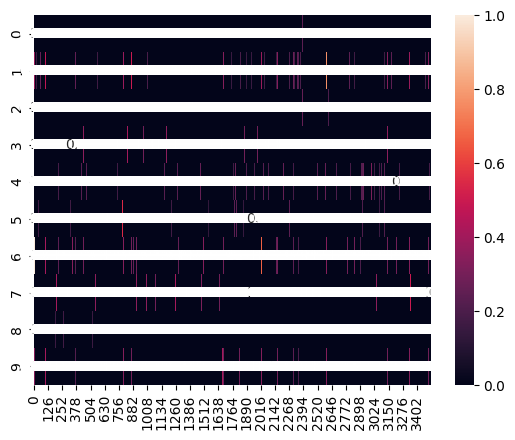

In [140]:
# Use seaborn to generate heatmap
import seaborn as sns
sns.heatmap(cosine_sim_mat[0:10],annot=True)


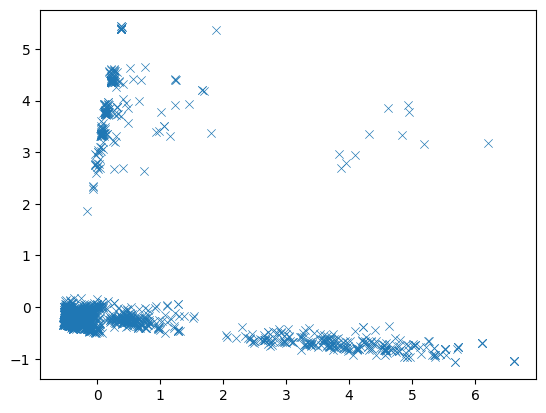

In [146]:
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensionality to 2
pca = PCA(n_components=2)
reduced_matrix = pca.fit_transform(cosine_sim_mat)

# Create a scatter plot of the reduced matrix
sns.scatterplot(x=reduced_matrix[:, 0], y=reduced_matrix[:, 1], marker='x')

# Label the points with the index of the corresponding item or document
# for i, (x, y) in enumerate(reduced_matrix):
#     plt.text(x, y, str(i))
    
# Show the plot
plt.show()

In [147]:
df.head()


,course_name,university,difficulty_level,course_rating,course_url,course_description,course_skills,clean_course_name
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...,Write Feature Length Screenplay Film Television
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...,Business Strategy Business Model Canvas Analys...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...,Silicon Thin Film Solar Cells
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...,Finance Managers
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...,Retrieve Data SingleTable SQL Queries


In [153]:
# Get Course Index
course_indices = pd.Series(df.index,index=df['course_name']).drop_duplicates()

In [149]:
course_indices


course_name
Write A Feature Length Screenplay For Film Or Television                 0
Business Strategy: Business Model Canvas Analysis with Miro              1
Silicon Thin Film Solar Cells                                            2
Finance for Managers                                                     3
Retrieve Data using Single-Table SQL Queries                             4
                                                                      ... 
Capstone: Retrieving, Processing, and Visualizing Data with Python    3517
Patrick Henry: Forgotten Founder                                      3518
Business intelligence and data analytics: Generate insights           3519
Rigid Body Dynamics                                                   3520
Architecting with Google Kubernetes Engine: Production                3521
Length: 3522, dtype: int64

In [150]:
def recommend_course(title,num_of_rec=10):
    idx = course_indices[title]
    scores = list(enumerate(cosine_sim_mat[idx]))
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['course_name'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec)  


In [151]:
recommend_course('Finance for Managers',20)


,course_name,similarity_scores
419,Finance for Non-Financial Managers,0.816497
181,Construction Finance,0.500000
668,How to finance your venture ?,0.500000
1236,Behavioral Finance,0.500000
3431,Innovative Finance: Hacking finance to change ...,0.500000
3448,Finance for Startups,0.500000
646,Finance for Non-Financial Professionals,0.408248
832,Finance for Everyone: Decisions,0.408248
959,Finance for Everyone Capstone Project,0.408248
1010,Reinforcement Learning in Finance,0.408248
